In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
tf.random.set_seed(2024)
np.random.seed(2024)

In [11]:
tf.__version__

'2.18.0'

## `Load Dataset`

In [12]:
# Load Fashion MNIST
tf.random.set_seed(2024)
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 16s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 3s 1us/step


In [13]:
X_train_full.max()

np.uint8(255)

### `Data Processing`

In [14]:
# Normalizing and Transfer datatypes to (float32 & int32, enough for NN)
X_train_full = (X_train_full/255.0).astype('float32')
y_train_full = y_train_full.astype('int32')
np.unique(y_train_full)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [6]:
X_test = (X_test/255.0).astype('float32')
y_test = y_test.astype('int32')

In [7]:
X_train_full.max(), X_test.max()

(1.0, 1.0)

## `Split Dataset`

In [15]:
# Split train to train & valid
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full,
                                                      test_size=0.1, shuffle=True, stratify=y_train_full)

print('X_train shape =>', X_train.shape)
print('y_train shape =>', y_train.shape)

print('----'*10)

print('X_val shape =>', X_valid.shape)
print('y_val shape =>', y_valid.shape)

print('----'*10)

print('X_test shape =>', X_test.shape)
print('y_test shape =>', y_test.shape)

X_train shape => (54000, 28, 28)
y_train shape => (54000,)
----------------------------------------
X_val shape => (6000, 28, 28)
y_val shape => (6000,)
----------------------------------------
X_test shape => (10000, 28, 28)
y_test shape => (10000,)


## `Getting Labels`

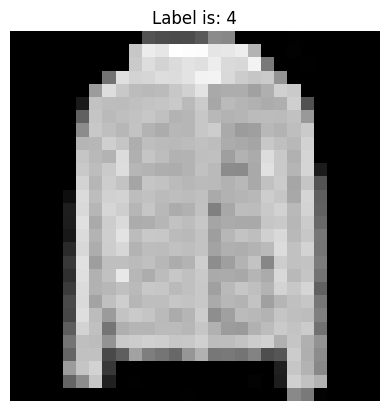

In [16]:
plt.imshow(X_train[0], cmap="gray")
plt.title(f"Label is: {y_train[0]}")
plt.axis("off")
plt.show()

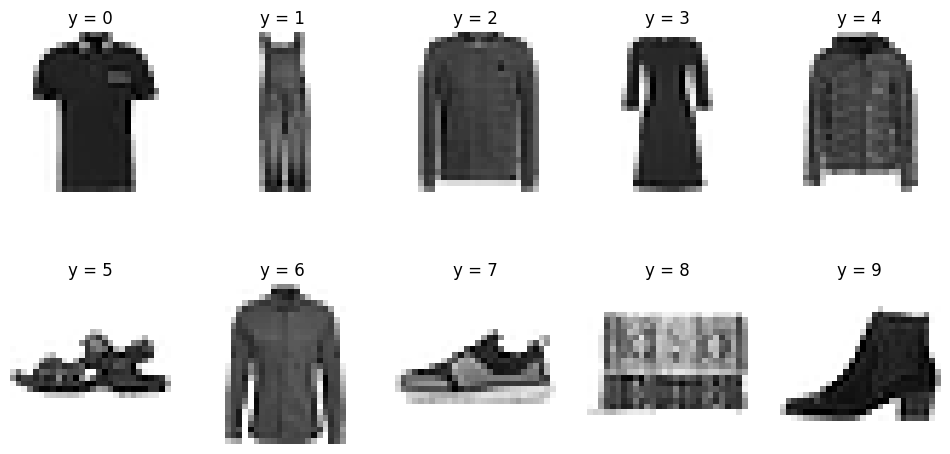

In [10]:
target_only_plot = pd.DataFrame(y_train, columns=['target'])

# Get one unique label with its index in dataset
# Get first unique value only. What this number belong to what photo
img_indicies = {}   # label: index
for i in range(len(np.unique(y_train))):
    img_indicies[i] = target_only_plot[target_only_plot['target']==i].index[0]

keys = list(img_indicies.keys())

# Plotting
fig, ax = plt.subplots(2, 5, figsize=(12, 6))

label = 0
for row in range(2):
  for col in range(5):
    plt.sca(ax[row, col])
    plt.imshow(X_train[img_indicies[label]], cmap='binary')
    plt.title(f'y = {keys[label]}', fontsize=12, c='k')
    plt.axis('off')
    label += 1

In [11]:
# you can now know for each target value belong to what class
class_names = ['T_Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_Boot']

# I will do that later, Instead of just retunring an integer I will return its string name
class_names[y_train[0]]

'Coat'

## `Building Model`

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

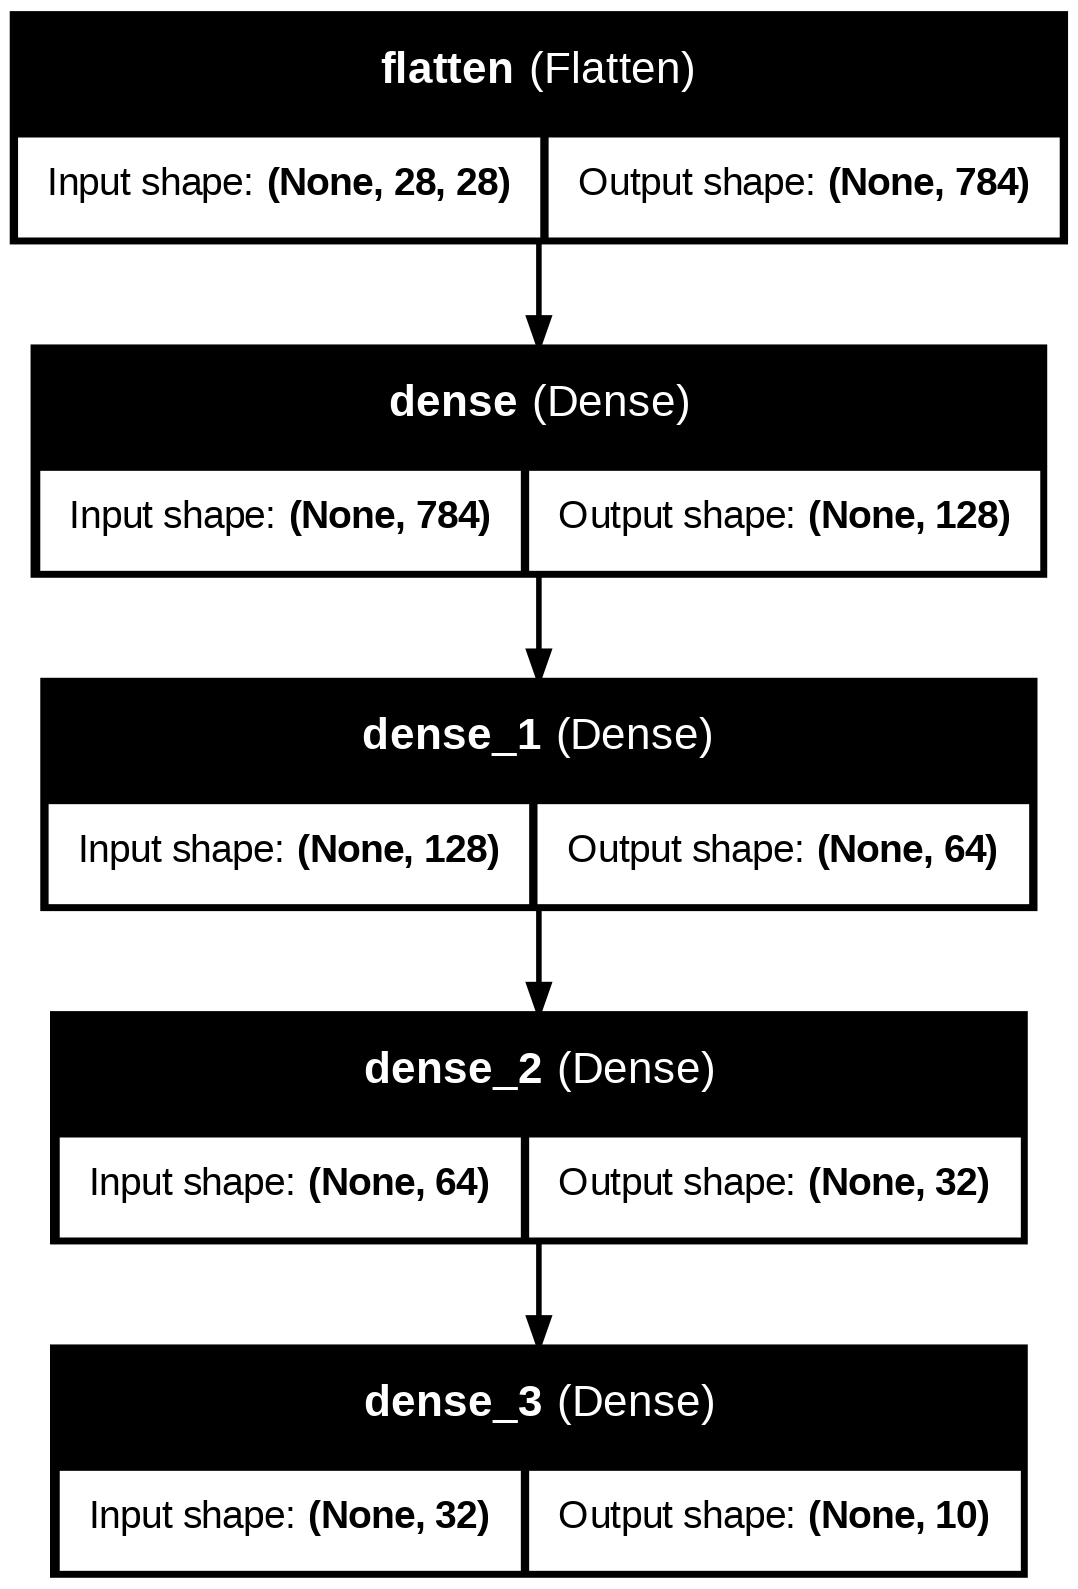

In [13]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [14]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>,
 <Dense name=dense_3, built=True>]

In [15]:
w, b = model.layers[1].get_weights()

w.shape, b.shape

((784, 128), (128,))

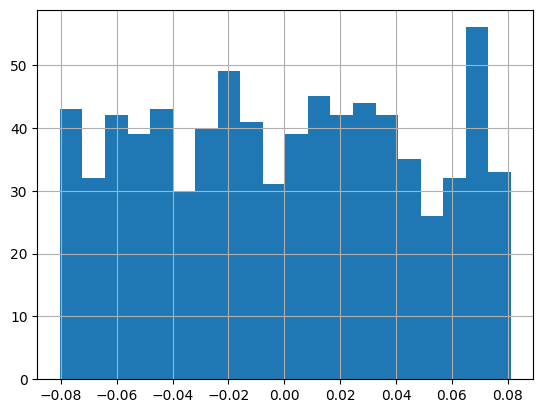

In [16]:
pd.DataFrame(w).iloc[:, 5].hist(bins=20);

In [17]:
# Early Stopping (Optional) callback to reduce overfitting
early_stopp = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                               patience=5, restore_best_weights=True)

# Compiling
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
# Training
history = model.fit(X_train, y_train,
                    validation_data=(X_valid, y_valid),
                    epochs=20,
                    batch_size=32,
                    callbacks=[early_stopp])

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6018 - loss: 1.1831 - val_accuracy: 0.7528 - val_loss: 0.6600
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8117 - loss: 0.5348 - val_accuracy: 0.7948 - val_loss: 0.5586
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8335 - loss: 0.4689 - val_accuracy: 0.8090 - val_loss: 0.5181
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8467 - loss: 0.4328 - val_accuracy: 0.8267 - val_loss: 0.4746
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8562 - loss: 0.4073 - val_accuracy: 0.8333 - val_loss: 0.4540
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8624 - loss: 0.3882 - val_accuracy: 0.8400 - val_loss: 0.4350
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8678 - loss: 0.3727 - val_accuracy: 0.8460 - val_loss: 0.4218
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8713 - loss: 0.3593 - 

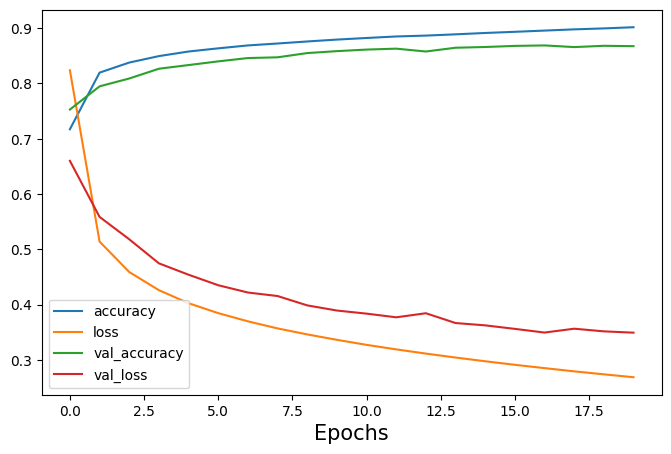

In [18]:
# Plotting History Results
history_info = history.history
pd.DataFrame(history_info).plot(figsize=(8, 5))
plt.xlabel('Epochs', fontsize=15)
plt.legend(loc='lower left')
plt.show()

## `Evaluating`

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Labels:  [9 2 1]

Predicted Class Names:  ['Ankle_Boot', 'Pullover', 'Trouser']


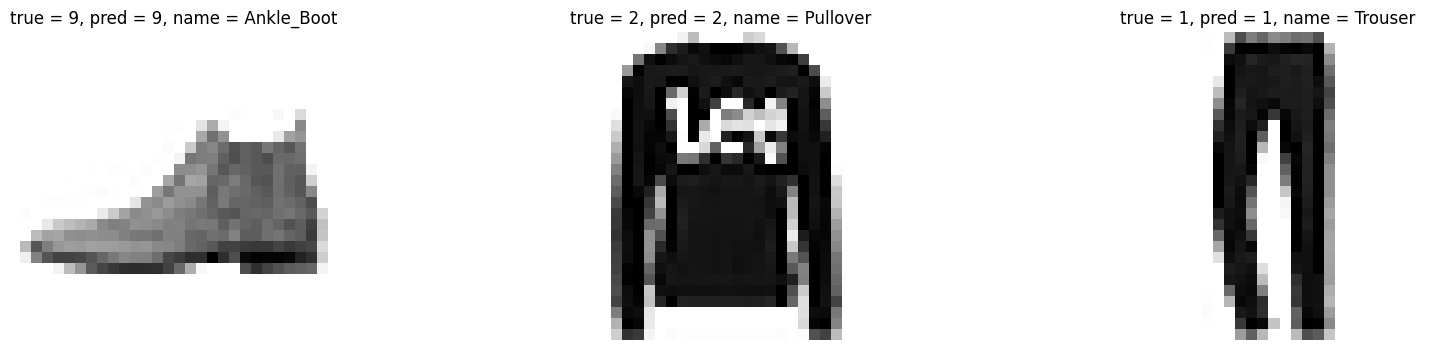

In [26]:
# Example of sample of new data point
X_new = X_test[:3]
y_new = y_test[:3]

y_pred_new = np.argmax(model.predict(X_new), axis=-1)
print('Predicted Labels: ', y_pred_new)
print()

# To get thier class_names
y_pred_names = [class_names[y_pred_new[i]] for i in range(len(y_pred_new))]
print('Predicted Class Names: ', y_pred_names)

# visualize what we get in this cell
print('==='*25)
fig, ax = plt.subplots(1, 3, figsize=(20, 4))

plt.sca(ax[0])
plt.imshow(X_new[0], cmap='binary')
plt.title(f'true = {y_new[0]}, pred = {y_pred_new[0]}, name = {y_pred_names[0]}')
plt.axis('off')
plt.sca(ax[1])
plt.imshow(X_new[1], cmap='binary')
plt.title(f'true = {y_new[1]}, pred = {y_pred_new[1]}, name = {y_pred_names[1]}')
plt.axis('off')
plt.sca(ax[2])
plt.imshow(X_new[2], cmap='binary')
plt.title(f'true = {y_new[2]}, pred = {y_pred_new[2]}, name = {y_pred_names[2]}')
plt.axis('off');

-----

In [27]:
# Dump model
model.save('model.keras')